In [1]:
#ロジスティック回帰
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import linear_model

In [78]:
iris = pd.read_csv('iris.csv')

In [84]:
usedata = np.logical_or(iris["variety"] == "Setosa", iris["variety"] == "Virginica") 

In [85]:
usedata

0      True
1      True
2      True
3      True
4      True
       ... 
145    True
146    True
147    True
148    True
149    True
Name: variety, Length: 150, dtype: bool

In [86]:
setosa_virginica = iris[usedata].reset_index(drop=True)

In [87]:
setosa_virginica.shape

(100, 5)

In [88]:
setosa_virginica

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
95,6.7,3.0,5.2,2.3,Virginica
96,6.3,2.5,5.0,1.9,Virginica
97,6.5,3.0,5.2,2.0,Virginica
98,6.2,3.4,5.4,2.3,Virginica


In [89]:
# ダミー変数を用意
dummies = pd.get_dummies(setosa_virginica["variety"])
setosa_virginica = pd.concat([setosa_virginica, dummies], axis = 1)

In [90]:
setosa_virginica

,sepal.length,sepal.width,petal.length,petal.width,variety,Setosa,Virginica
0,5.1,3.5,1.4,0.2,Setosa,1,0
1,4.9,3.0,1.4,0.2,Setosa,1,0
2,4.7,3.2,1.3,0.2,Setosa,1,0
3,4.6,3.1,1.5,0.2,Setosa,1,0
4,5.0,3.6,1.4,0.2,Setosa,1,0
...,...,...,...,...,...,...,...
95,6.7,3.0,5.2,2.3,Virginica,0,1
96,6.3,2.5,5.0,1.9,Virginica,0,1
97,6.5,3.0,5.2,2.0,Virginica,0,1
98,6.2,3.4,5.4,2.3,Virginica,0,1


In [91]:
X = setosa_virginica[["sepal.length", "sepal.width"]]
Y = setosa_virginica["Setosa"]

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
LogRegr= LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
LogRegr.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
print(LogRegr.coef_) #偏回帰係数

[[-3.14745566  2.22454385]]


In [96]:
print(LogRegr.intercept_) #切片

[10.75428623]


In [99]:
print(pd.crosstab(Y, LogRegr.predict(X))) #予測結果をクロステーブルで確認

# Setosa=0(真値)のときにcol=1(予測では偽値)のデータが一つあった。
# Setosa=1(偽値)のときにcol=0(予測では偽値)のデータは一つもなかった。

#つまり、Setosaの2値分類は一つ取りこぼしているが、Virginicaの2値分類はミスってはいない

col_0    0   1
Setosa        
0       49   1
1        0  50


In [108]:
# 結果をグラフ化してみる
xMin = X["sepal.length"].min()
xMax = X["sepal.length"].max()
yMin = X["sepal.width"].min()
yMax = X["sepal.width"].max()

xx, yy = np.meshgrid(np.arange(xMin, xMax, 0.01), np.arange(yMin, yMax, 0.01))

In [109]:
Z = LogRegr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

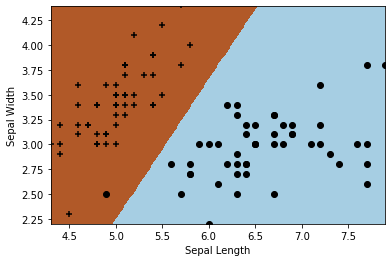

In [119]:
plt.figure()
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X["sepal.length"].iloc[Y.values==0], X["sepal.width"].iloc[Y.values==0], marker="o", c="black")
plt.scatter(X["sepal.length"].iloc[Y.values==1], X["sepal.width"].iloc[Y.values==1], marker="+", c="black")

In [120]:
#このように図で確認することは説明変数が2変数である必要があるが、例え3変量以上のときでも、どのような値が正しく分類できていないのかを調査することは非常に重要。